## 简单线性回归（Simple Linear Regression）

加载单因子线性回归的数据，


### 加载训练数据

In [64]:
import pandas as pd

# Flare Zhao老师生成的数据，一个完美的线性关系
data = pd.read_csv("..//dataset//linear_regression//generated_data.csv")

In [65]:
# 观察和了解数据的维度和名称
data.head()

,x,y
0,1,7
1,2,9
2,3,11
3,4,13
4,5,15


In [66]:
# 数据类型是 Pandas DataFrame，10行2列
print(type(data), data.shape)

<class 'pandas.core.frame.DataFrame'> (10, 2)


### 设置 特征数据/自变量（X）和 目标变量/因变量（y）


In [67]:
# assign data to X, y
# X 是特征数据，y是目标变量或者标签
X = data.loc[:, "x"]
y = data.loc[:, "y"]
print(X, y)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: x, dtype: int64 0     7
1     9
2    11
3    13
4    15
5    17
6    19
7    21
8    23
9    25
Name: y, dtype: int64


### 观察原始数据

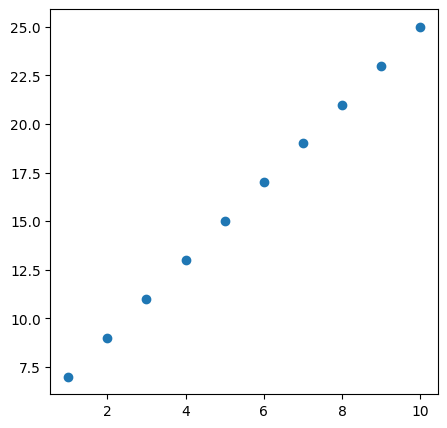

In [68]:
# visualize the data
from matplotlib import pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(X, y)
plt.show()

In [69]:
# 当前 X 和 y 是 Pandas Series 数据类型，有 10 行数据
print(type(X), X.shape)
print(type(y), y.shape)

<class 'pandas.core.series.Series'> (10,)
<class 'pandas.core.series.Series'> (10,)


### 建立线性回归模型（Linear Regression Mode）

In [70]:
# set up a linear regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [71]:
import numpy as np

# 转换成 NumPy 的 NumPy 的数组，并重塑为一个二维数组，只有一列，行数自动计算
# 后续的的数据分析和模型训练需要 ArrayLike 的数据
X = np.array(X).reshape(-1, 1)

y = np.array(y).reshape(-1, 1)

In [72]:
# 数据有 10 行 1 列
print(type(X), X.shape)
print(X[9, 0])
print(X)


<class 'numpy.ndarray'> (10, 1)
10
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


### 训练模型

In [73]:
# 训练模型，根据 X 和 y 中的数据来训练模型，通过最小化预测值与实际值之间的差异来优化模型的参数
# X 是一个包含多个特征的二维数组（或类似数组的结构，如NumPy数组、Pandas DataFrame等）
# y 是一个一维数组，包含与 X 中的每个样本相对应的目标值。
lr_model.fit(X, y)

# 在训练完成后，lr_model 将包含训练得到的参数，这些参数是基于训练数据学习得到的，用于后续的预测任务
lr_model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

### 数据预测

In [74]:
# 对数据集 X 进行预测，利用模型在训练阶段学习到的参数来预测新数据的目标值
# X 是原始数据，通过对原始数据的预测，预测值是基于模型在训练阶段学习到的规律和模式计算得出的
# y_predict 一个一维数组，包含了模型对数据集 X 中每个样本的预测值

y_predict = lr_model.predict(X)

In [75]:
# y_predict 一个一维数组，有10行
print(type(y_predict))
print(y_predict.shape)
print(y_predict)

<class 'numpy.ndarray'>
(10, 1)
[[ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]
 [23.]
 [25.]]


In [76]:
# y = aX + b
# y = a_1*x_1 + a_2*x_2 + ... + a_n*x_n + b
# a 是一个数组，表示特征的系数(斜率),即上面的 a_1, a_2, ..., a_n, coefficient
# b 是一个标量，是截距 intercept，即当所有特征 x_i 都为0时模型的预测值
a = lr_model.coef_
b = lr_model.intercept_
print(type(a), a.shape, a)
print(type(b), b.shape, b)

<class 'numpy.ndarray'> (1, 1) [[2.]]
<class 'numpy.ndarray'> (1,) [5.]


### 评估模型

#### MSE 和 R2 方法

In [77]:
# 导入所需的评估指标函数
from sklearn.metrics import mean_squared_error, r2_score

# 均方误差（Mean Squared Error, MSE）
# MSE 是真实值与预测值之间差值的平方的平均值。它衡量了预测值与实际值之间的平均误差大小。MSE 的值越小，说明模型的预测越准确。
MSE = mean_squared_error(y, y_predict)

# 决定系数（R² Score）
# R² Score，也称为R平方或拟合优度，表示模型对数据的拟合程度
# 它的值介于0到1之间。一个值为1的R² Score表示模型完美地预测了数据，而值为0则表示模型没有提供任何有用的信息（即预测值与平均值一样好）
# 注意，R² Score也可能为负值，这通常发生在模型非常差的情况下，表示模型比简单预测输出平均值还要差
R2 = r2_score(y, y_predict)

# 评估模型的性能，MSE越小且R² Score越接近1，说明模型的预测性能越好。
# 如果R² Score较低或MSE较高，则可能需要调整模型或尝试其他建模技术来改进预测性能。
print("MSE: ", MSE)
print("R2: ", R2)

MSE:  3.1554436208840474e-31
R2:  1.0


#### 画图观察法

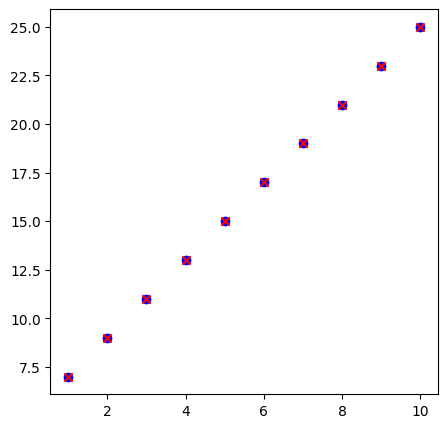

In [78]:
# 通过观察，发现两个数据拟合的非常好
plt.figure(figsize=(5, 5))

plt.scatter(X, y, c="b", marker="o")
plt.scatter(X, y_predict, c="r", marker="x")

plt.show()

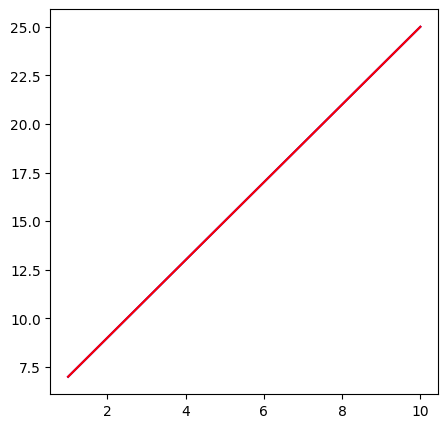

In [79]:
# 通过观察，发现两个数据拟合的非常好
plt.figure(figsize=(5, 5))

plt.plot(X, y, c='b')
plt.plot(X, y_predict, c='r')

plt.show()